<a href="https://colab.research.google.com/github/GiselBustos/CKDdetection/blob/main/CKD_Detection_Model_clean_for_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT ANTIGRAVITY | Chronic Disease Detection 🤖**

* Agent Name: Reni (AI Agent)
* Specialization: Chronic Kidney Disease Detection Model
* Environment: Python 3.13.5

**To see all modeling analysis, consult the main Project:**

https://colab.research.google.com/github/GiselBustos/CKDdetection/blob/main/Chronic_Kidney_Disease_Detection_Model.ipynb


#Introduction

**Chronic kidney disease (CKD)**, also called **chronic renal failure**, involves a gradual loss of kidney function.
The kidneys filter wastes and excess fluids from the blood, which are eliminated through urine.

Advanced chronic kidney disease can cause dangerous levels of fluid, electrolytes and wastes to build up in the body.
Treatment of chronic kidney disease focuses on slowing the progression of kidney damage, usually by controlling the cause. However, even controlling the cause may not stop kidney damage from progressing.[<sup>[1]</sup>](https://www.mayoclinic.org/es/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521)


# Information on the DataSet used



The data is real, measured by the Enam Medical College of Bangladesh. The database complies with data protection regulations, as it does not contain sensitive information about the patients studied.


####**Indicators in the DataSet** [<sup>[7]<sup>](https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease)

1. bp(Diastolic) : Blood Pressure[mmHg]
2. bp limit : Blood Pressure limit
3. sg : Specific Gravity [1.005-1.025]
4. al : Albumin [Range 0-5, the higher the better]
5. class : Classification [Given as CKD or not CKD]
6. rbc : Red Blood Cells [abnormal or normal]
7. su : Sugar level [5 levels indicating severity]
8. pc : pus cell [normal, abnormal]
9. pcc : pus cell clumps [Not present, present]
10. ba : Bacteria [present, not present]
11. bgr :Blood Glucose Random [mgs/dl]
12. bu : Blood Urea [mgs/dl]
13. sod : Sodium [mEq/L]
14. sc : Serum creatinine [high level is not good]
15. pot : Potassium [mEq/L]
16. hemo : Hemoglobin [Less than 5 is kidney failure]
17. pcv : Packed cell volume
18. rbcc : Red Blood Cell Count [Should not be higer or less than normal]
19. wbcc : White Blood Cell Count [Numerical cell count]
20. htn : Hypertension [yes or not]
21. dm : Diabetes Mellitus [No, Yes]
22. cad : Coronary artery disease [No,Yes]
23. appet : Appetite [Poor, Good]
24. pe : Peda Edema [No, Yes]
25. ane : Anemia [No, Yes]
26. grf : Glomerular Ratio of Filtration [<sup>[8]<sup>](https://www.kidneyfund.org/es/todo-sobre-los-rinones/las-pruebas-de-deteccion-de-la-enfermedad-renal/analisis-de-sangre-la-egfr)
27. stage
28. affected
29. age

#Libraries

In [1]:
import pandas as pd
import numpy as np

#Graphics Libraries
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import seaborn.objects as so
import plotly.express as px #3D


#Model Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import tree
from sklearn.tree import export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import random as rand

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

from scipy.stats import shapiro # Distribution test
from statsmodels.graphics.gofplots import qqplot #Distribution test
from scipy import stats #Outliers test

#Import Library
from google.colab import files

import warnings
warnings.filterwarnings("ignore")

## File Upload and Label Change

In [2]:
uploaded = files.upload()

Saving ckd-dataset-v2-corregido.csv to ckd-dataset-v2-corregido.csv


In [3]:
data_names = ['BloodPressure','BloodPressureLimit','SpecificGravity','Albumin','Class','RedBloodCells','SugarLevel','PusCell','PusCellClumps','Bacteria','BloodGlucoseRandom','BloodUrea','Sodium','SerumCreatinine','Potassium','Hemoglobin','PackedCellVolume','RedBloodCellCount','WhiteBloodCellCount','Hypertension','DiabetesMellitus','CoronaryArteryDisease','Appetite','PedaEdema','Anemia','GlomerularRatio','Stage','Affected','Age']
data = pd.read_csv('ckd-dataset-v2-corregido.csv',names = data_names,header=0)

OBS: This part was created to export the model and used it as Tool in an Agent.

In [4]:
import joblib
from google.colab import drive

drive.mount('/content/drive')

!mkdir -p "/content/drive/MyDrive/antigravity_project/models"

Mounted at /content/drive


In [5]:
data.columns

Index(['BloodPressure', 'BloodPressureLimit', 'SpecificGravity', 'Albumin',
       'Class', 'RedBloodCells', 'SugarLevel', 'PusCell', 'PusCellClumps',
       'Bacteria', 'BloodGlucoseRandom', 'BloodUrea', 'Sodium',
       'SerumCreatinine', 'Potassium', 'Hemoglobin', 'PackedCellVolume',
       'RedBloodCellCount', 'WhiteBloodCellCount', 'Hypertension',
       'DiabetesMellitus', 'CoronaryArteryDisease', 'Appetite', 'PedaEdema',
       'Anemia', 'GlomerularRatio', 'Stage', 'Affected', 'Age'],
      dtype='object')

In [6]:
#Object data analysis

for column in data.columns:

  DataCol = data[column]

  if DataCol.dtype == "object":
    Obj = DataCol.unique()
    print(column)
    print("\nDiferent values in", column , ":", len(Obj))
    print("Values:", Obj)
    print("---------------------")


SpecificGravity

Diferent values in SpecificGravity : 5
Values: ['1.019 - 1.021' '1.009 - 1.011' '1.015 - 1.017' '≥ 1.023' '< 1.007']
---------------------
Albumin

Diferent values in Albumin : 5
Values: ['1 - 1' '< 0' '≥ 4' '3 - 3' '2 - 2']
---------------------
Class

Diferent values in Class : 2
Values: ['ckd' 'notckd']
---------------------
SugarLevel

Diferent values in SugarLevel : 6
Values: ['< 0' '4 - 4' '2 - 2' '3 - 4' '1 - 2' '≥ 4']
---------------------
BloodGlucoseRandom

Diferent values in BloodGlucoseRandom : 10
Values: ['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364']
---------------------
BloodUrea

Diferent values in BloodUrea : 8
Values: ['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7']
---------------------
Sodium

Diferent values in Sodium : 9
Values: ['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 -

In [7]:
#Integers Convertion

#The average will be used in as many ranges of values as possible, in order to have fewer categorical variables and then simplify the prediction with new values.

#Conversion to average values

#'1.019 - 1.021'--> 1.020 ;  '1.009 - 1.011' --> 1.010 ; '1.015 - 1.017' --> 1.016 ; '≥ 1.023' --> 1.023 ; '< 1.007' --> 1.007
data['SpecificGravity'] = data['SpecificGravity'].replace(['1.019 - 1.021', '1.009 - 1.011' ,'1.015 - 1.017' ,'≥ 1.023' ,'< 1.007'],[1.020,1.010,1.016,1.023,1.007])

#'1 - 1' --> 1 ;  '< 0'--> 0 ;  '≥ 4' --> 4 ; '3 - 3' --> 3 ;  '2 - 2' --> 2
data['Albumin'] = data['Albumin'].replace(['1 - 1', '< 0', '≥ 4' ,'3 - 3', '2 - 2'],[1,0,4,3,2])

#'< 0' --> 0 ;  '4 - 4' --> 4 ; '2 - 2' --> 2 ; '3 - 4' --> 3.5 ,'1 - 2' --> 1.5 '≥ 4' --> 4.5
data['SugarLevel'] = data['SugarLevel'].replace(['< 0', '4 - 4', '2 - 2' ,'3 - 4' ,'1 - 2', '≥ 4'],[0,4,2,3.5,1.5,4.5])

#'< 112' --> 112 ;'112 - 154' --> 133 ; '154 - 196' --> 175 ,'406 - 448' --> 427 ; '238 - 280' --> 259 ;  '196 - 238' --> 217 ;  '≥ 448' --> 448 ; '280 - 322' --> 301 ; '364 - 406' --> 385;  '322 - 364' --> 343
data['BloodGlucoseRandom'] = data['BloodGlucoseRandom'].replace(['< 112' ,'112 - 154' ,'154 - 196' ,'406 - 448' ,'238 - 280', '196 - 238', '≥ 448', '280 - 322', '364 - 406', '322 - 364'],[112,133,175,427,259,217,448,301,385,343])

#'< 48.1' --> 48.1 ; '48.1 - 86.2' --> 67.15 ; '200.5 - 238.6' --> 219.55 ;'124.3 - 162.4' --> 143.35 ;'86.2 - 124.3' --> 105.25 ; '162.4 - 200.5' --> 181.45 ; '≥ 352.9' --> 352.9 ; '238.6 - 276.7' --> 257.65
data['BloodUrea'] = data['BloodUrea'].replace(['< 48.1' ,'48.1 - 86.2' ,'200.5 - 238.6' ,'124.3 - 162.4' ,'86.2 - 124.3', '162.4 - 200.5', '≥ 352.9' ,'238.6 - 276.7'],[48.1,67.15,219.55,143.35,105.25,181.45,352.9,257.65])

#'138 - 143'--> 140.5;  '133 - 138'--> 135.5; '123 - 128' --> 125.5 ;  '143 - 148' --> 145.5 ;  '148 - 153' --> 150.5 ; '< 118'--> 118 ;  '128 - 133' -->  130.5;  '118 - 123'  --> 120.5 ;'≥ 158' --> 158
data['Sodium'] = data['Sodium'].replace( ['138 - 143', '133 - 138', '123 - 128', '143 - 148', '148 - 153' ,'< 118', '128 - 133', '118 - 123' ,'≥ 158'],[140.5,135.5,125.5,145.5,150.5,118,130.5,120.5,158])

#'< 3.65' --> 3.65 ; '3.65 - 6.8' --> 5.225 ; '16.25 - 19.4' --> 17.825 ; '6.8 - 9.95' --> 8.375 ; '13.1 - 16.25' --> 14.675 ; '9.95 - 13.1' --> 11.525 ; '≥ 28.85' --> 28.85
data['SerumCreatinine'] = data['SerumCreatinine'].replace(['< 3.65' ,'3.65 - 6.8', '16.25 - 19.4' ,'6.8 - 9.95' ,'13.1 - 16.25', '9.95 - 13.1' ,'≥ 28.85'],[6.35,5.225,17.825,8.375,14.675,11.525,28.85])

#'< 7.31'--> 7.31 ; '≥ 42.59' --> 42.59 ; '7.31 - 11.72' --> 9.515 ; '38.18 - 42.59' --> 40.385
data['Potassium'] = data['Potassium'].replace(['< 7.31', '≥ 42.59' ,'7.31 - 11.72' ,'38.18 - 42.59'],[7.31,42.59,9.515,40.385])

#'11.3 - 12.6'--> 11.95 ;'8.7 - 10' --> 9.35 ;'13.9 - 15.2' --> 14.55 ;'≥ 16.5'--< 16.5 ; '10 - 11.3' --> 10.65 ;'7.4 - 8.7' --> 8.05 ; '12.6 - 13.9' --> 13.25 ; '15.2 - 16.5' --> 15.85 ;'< 6.1' --> 6.1 ; '6.1 - 7.4' --> 6.75
data['Hemoglobin'] = data['Hemoglobin'].replace(['11.3 - 12.6' ,'8.7 - 10' ,'13.9 - 15.2' ,'≥ 16.5', '10 - 11.3' ,'7.4 - 8.7', '12.6 - 13.9', '15.2 - 16.5' ,'< 6.1', '6.1 - 7.4'],[11.95,9.35,14.55,16.5,10.65,80.05,13.25,15.85,6.1,6.75])

#'33.5 - 37.4'--> 35.45 ; '29.6 - 33.5' --> 31.55 ;'41.3 - 45.2' --> 43.25 ;'37.4 - 41.3' --> 39.35 ;'≥ 49.1' --> 49.1 ; '21.8 - 25.7' --> 23.75 ; '45.2 - 49.1' --> 47.15 ; '< 17.9' --> 17.9  ;'25.7 - 29.6' --> 27.65 ;'17.9 - 21.8' --> 19.85
data['PackedCellVolume'] = data['PackedCellVolume'].replace(['33.5 - 37.4', '29.6 - 33.5' ,'41.3 - 45.2' ,'37.4 - 41.3' ,'≥ 49.1', '21.8 - 25.7', '45.2 - 49.1', '< 17.9' ,'25.7 - 29.6' ,'17.9 - 21.8'],[35.45,31.55,43.25,39.35,49.1,23.75,47.15,17.9,27.65,19.85])

#'4.46 - 5.05'--> 4.755 ; '5.05 - 5.64' --> 5.345 ; '3.28 - 3.87' --> 3.575 ; '3.87 - 4.46' --> 4.165 ; '6.23 - 6.82'--> 6.525 ;  '5.64 - 6.23' --> 5.935 ; '2.69 - 3.28'--> 2.985 ; '< 2.69'--> 2.69 ; '≥ 7.41' --> 7.41
data['RedBloodCellCount'] = data['RedBloodCellCount'].replace(['4.46 - 5.05', '5.05 - 5.64' ,'3.28 - 3.87', '3.87 - 4.46' ,'6.23 - 6.82', '5.64 - 6.23', '2.69 - 3.28', '< 2.69', '≥ 7.41'],[4.755,5.345,3.575,4.165,6.525,5.935,2.985,2.69,7.41])

#'7360 - 9740'--> 8550 ; '12120 - 14500'-->13310 ; '14500 - 16880'--> 15690 ; '4980 - 7360' --> 6170 ;'< 4980'--> 4980; '9740 - 12120' --> 10930 ; '16880 - 19260' --> 18070 ; '≥ 24020'--> 24020 ; '19260 - 21640' --> 20450
data['WhiteBloodCellCount'] = data['WhiteBloodCellCount'].replace(['7360 - 9740', '12120 - 14500', '14500 - 16880', '4980 - 7360' ,'< 4980', '9740 - 12120' ,'16880 - 19260' ,'≥ 24020', '19260 - 21640'],[8550,13310,15690,6170,4980,10930,18070,24020,20450])

#'≥ 227.944' --> 227.944 ;'127.281 - 152.446' --> 139.8635 ; '102.115 - 127.281'--> 114.698 ; '177.612 - 202.778'--> 190.195 ; '26.6175 - 51.7832' --> 39.20035 ; '51.7832 - 76.949' --> 64.3661 ;'76.949 - 102.115'--> 89.532 ; '152.446 - 177.612' --> 165.029 ;'202.778 - 227.944' --> 215.361; '< 26.6175' --> 26.6175;' p ' --> 0
data['GlomerularRatio'] = data['GlomerularRatio'].replace(['≥ 227.944' ,'127.281 - 152.446', '102.115 - 127.281', '177.612 - 202.778', '26.6175 - 51.7832', '51.7832 - 76.949' ,'76.949 - 102.115', '152.446 - 177.612' ,'202.778 - 227.944' ,'< 26.6175' ,' p '],[227.944,139.8635,114.698,190.195,39.20035,64.3661,89.532,165.029,215.361,26.6175,0])

#< 12' --> 12 ; '12 - 20' --> 16 ; '20 - 27'--> 23.5 ; '27 - 35' --> 31 ;  '35 - 43'--> 39;  '43 - 51'--> 47 ; '51 - 59' --> 55 ; '59 - 66' --> 62.5 ;'66 - 74' --> 70;'≥ 74' -->74
data['Age'] = data['Age'].replace(['< 12' ,'12 - 20' ,'20 - 27', '27 - 35', '35 - 43', '43 - 51', '51 - 59', '59 - 66' ,'66 - 74' ,'≥ 74'],[12,16,23.5,31,39,47,55,62.5,70,74])


#Categorical

data['Class'] = data['Class'].replace(['ckd' ,'notckd'],[1,0])
data['Stage'] = data['Stage'].replace(['s1','s2','s3','s4','s5'],[1,2,3,4,5])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BloodPressure          200 non-null    int64  
 1   BloodPressureLimit     200 non-null    int64  
 2   SpecificGravity        200 non-null    float64
 3   Albumin                200 non-null    int64  
 4   Class                  200 non-null    int64  
 5   RedBloodCells          200 non-null    int64  
 6   SugarLevel             200 non-null    float64
 7   PusCell                200 non-null    int64  
 8   PusCellClumps          200 non-null    int64  
 9   Bacteria               200 non-null    int64  
 10  BloodGlucoseRandom     200 non-null    int64  
 11  BloodUrea              200 non-null    float64
 12  Sodium                 200 non-null    float64
 13  SerumCreatinine        200 non-null    float64
 14  Potassium              200 non-null    float64
 15  Hemogl

In [8]:
#Export converted date in a CSV file

data.to_csv('data_ckd_converted.csv', index=False)
print("Processed data exported to 'data_ckd_converted.csv'")

Processed data exported to 'data_ckd_converted.csv'


In [ ]:
data.describe()

,BloodPressure,BloodPressureLimit,SpecificGravity,Albumin,Class,RedBloodCells,SugarLevel,PusCell,PusCellClumps,Bacteria,...,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedaEdema,Anemia,GlomerularRatio,Stage,Affected,Age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.540000,0.755000,1.017450,0.980000,0.640000,0.125000,0.417500,0.22500,0.135000,0.055000,...,0.390000,0.350000,0.110000,0.200000,0.175000,0.160000,69.958293,2.860000,0.640000,53.205000
std,0.499648,0.805119,0.004835,1.329828,0.481205,0.331549,1.072471,0.41863,0.342581,0.228552,...,0.488974,0.478167,0.313675,0.401004,0.380921,0.367526,53.523593,1.473518,0.481205,15.825381
min,0.000000,0.000000,1.007000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000
25%,0.000000,0.000000,1.016000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.617500,1.000000,0.000000,47.000000
50%,1.000000,1.000000,1.020000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.200350,3.000000,1.000000,55.000000
75%,1.000000,1.000000,1.020000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,89.532000,4.000000,1.000000,62.500000
max,1.000000,2.000000,1.023000,4.000000,1.000000,1.000000,4.500000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,227.944000,5.000000,1.000000,74.000000


In [9]:
data.shape

(200, 29)

In [10]:
data.isnull().sum() #Analysis of data set zeros

,0
BloodPressure,0
BloodPressureLimit,0
SpecificGravity,0
Albumin,0
Class,0
RedBloodCells,0
SugarLevel,0
PusCell,0
PusCellClumps,0
Bacteria,0


> **Related parameter analysis**

Analysing the ***Correlation matrix***, we can see the parameters that are most strongly related to the variable Class (taking those with a relationship greater than 0.5). In this case the relationships are:

*Direct relations:*

* Affected ( is directly related to the CKD)
* Stage ( makes sense, as the Stage gives us which Stage it is in.)
* Hypertension ( makes sense, as it is a symptom of kidney failure.)
* Diabetes Mellitus ( Over time, the high blood sugar levels caused by diabetes can damage the blood vessels in the kidneys and nephrons, causing them to stop working as they should. Many people with diabetes also have high blood pressure, which can also damage the kidneys.) [<sup>[CDC]</sup>](https://www.cdc.gov/diabetes/es/diabetes-complications/la-diabetes-y-la-enfermedad-cronica-de-los-rinones.html?CDC_AAref_Val=https://www.cdc.gov/diabetes/spanish/living/diabetes-kidney-disease.html)
* Albumin ( A healthy kidney does not allow albumin to pass from the blood into the urine, whereas a damaged kidney does allow some albumin to pass into the urine. ) [<sup>[NIH]</sup>](https://www.niddk.nih.gov/health-information/informacion-de-la-salud/enfermedades-rinones/informacion-general/diagnostico/albuminuria-albumina-orina)

*Inverse relations:*

* PackedCellVolume (hematocrit)
* Glomerular Ratio (makes sense because it is a measure of kidney function, also called Glomerular Filtration Rate.)
* Specific Gravity (provides information about the kidney's ability to concentrate urine, so it makes sense that it is related to CKD.)
* Red Blood Cell Count

Haematocrit and red blood cell count are directly related, and may be low in people with CKD.

> ***The joint evaluation of these studies can help physicians diagnose diseases and assess the progression of existing diseases.***

# Modeling

 > In the first instance, the aim is to classify into **Classes** (variable Class): With CKD and Without CKD.

 > Then, it will be determined in which **Stage** it is in (Stage variable): S1, S2, S3, S4 or S5.

 > The variable ***Affected*** will be removed, as it generates Overfitting of the result (indirectly this value tells us if it has CKD or not). As it is a value equivalent to ***Class***, which is what we are trying to determine, it will be removed from the training pull.

In [11]:
#70% of the database will be trained and the remaining 30% will be tested.

y_Class = data[['Class']]
y_Stage = data[['Stage']]

X = data[['BloodPressure','BloodPressureLimit','SpecificGravity','Albumin','RedBloodCells','SugarLevel','PusCell','PusCellClumps','Bacteria','BloodGlucoseRandom','BloodUrea','Sodium','SerumCreatinine','Potassium','Hemoglobin','PackedCellVolume','RedBloodCellCount','WhiteBloodCellCount','Hypertension','DiabetesMellitus','CoronaryArteryDisease','Appetite','PedaEdema','Anemia','GlomerularRatio','Age']].values


## ***Class*** Classification

In [12]:
X_Class = X

X_Class_train,X_Class_test,y_Class_train,y_Class_test = train_test_split(X_Class,y_Class,test_size = 0.3, random_state =2)

X_Class_train.shape

(140, 26)

In [13]:
y_Class_train.shape

(140, 1)

### Linear Discriminants

In [14]:
#Verifying the Gaussian distribution

ClassGaussTest = data.columns.drop('Class')
print(ClassGaussTest)

Index(['BloodPressure', 'BloodPressureLimit', 'SpecificGravity', 'Albumin',
       'RedBloodCells', 'SugarLevel', 'PusCell', 'PusCellClumps', 'Bacteria',
       'BloodGlucoseRandom', 'BloodUrea', 'Sodium', 'SerumCreatinine',
       'Potassium', 'Hemoglobin', 'PackedCellVolume', 'RedBloodCellCount',
       'WhiteBloodCellCount', 'Hypertension', 'DiabetesMellitus',
       'CoronaryArteryDisease', 'Appetite', 'PedaEdema', 'Anemia',
       'GlomerularRatio', 'Stage', 'Affected', 'Age'],
      dtype='object')


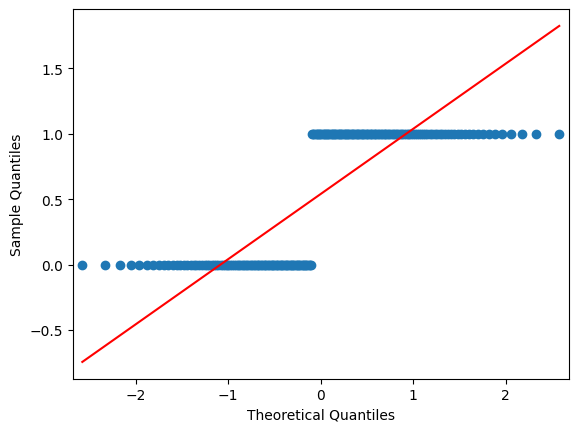

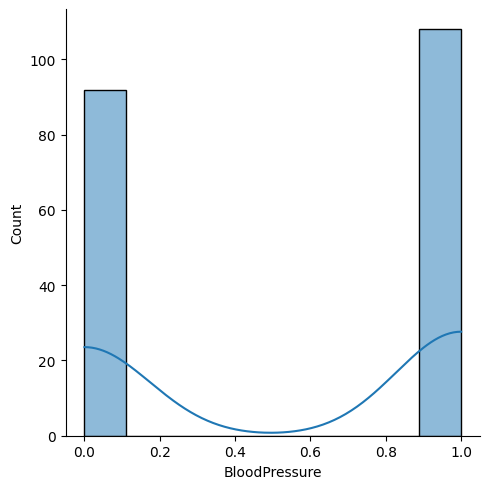

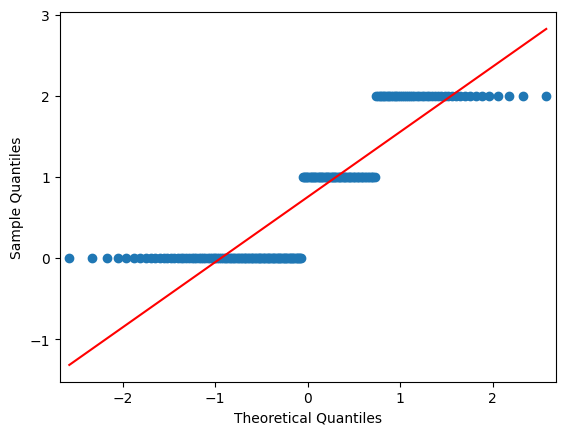

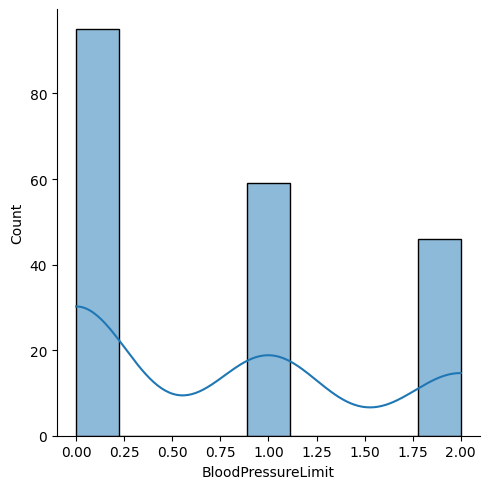

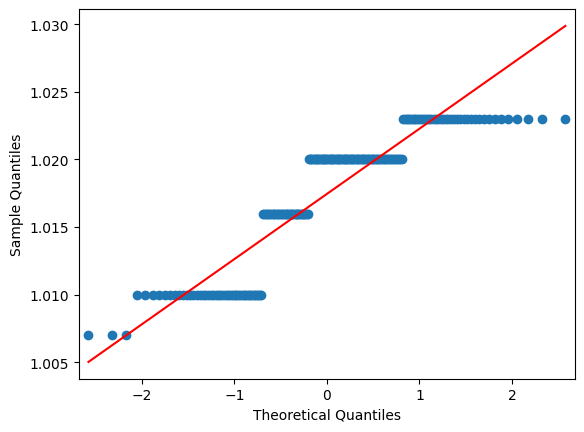

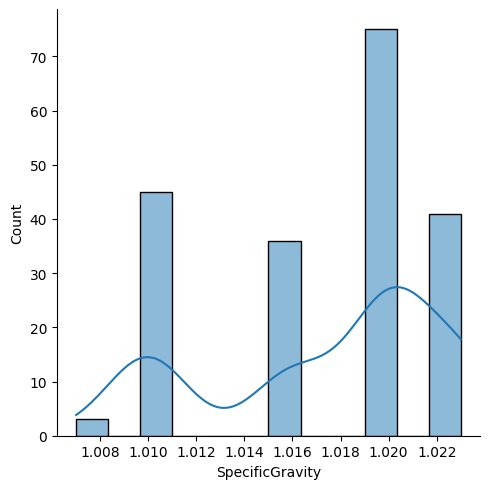

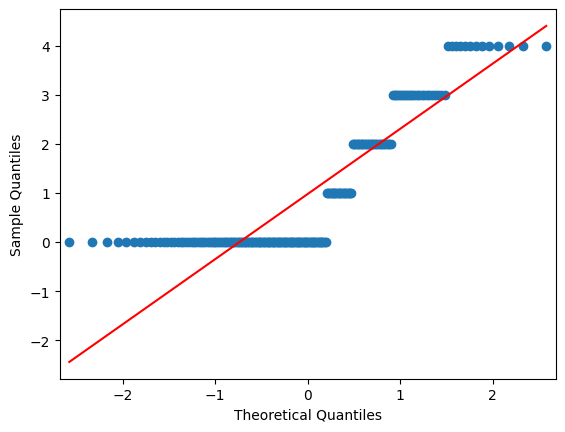

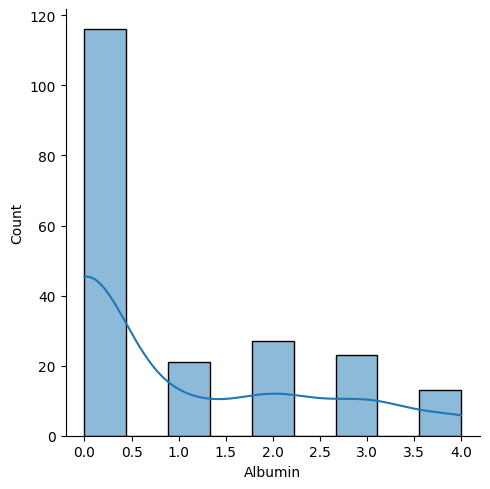

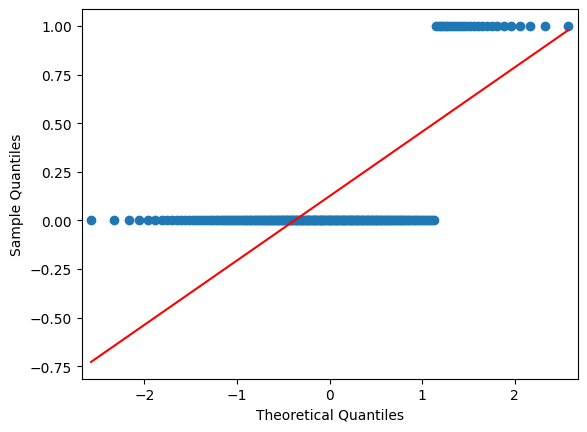

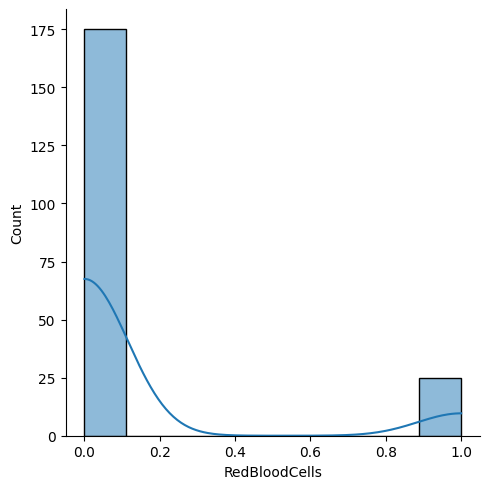

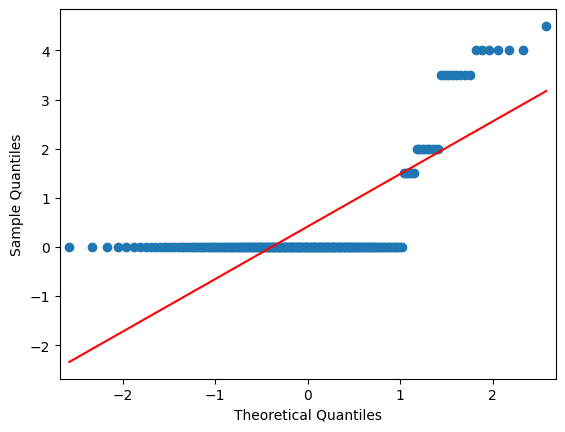

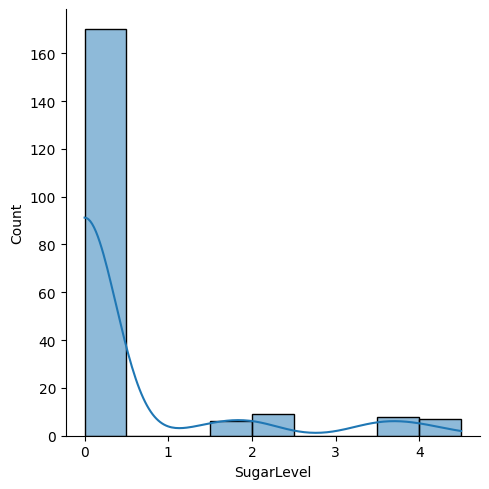

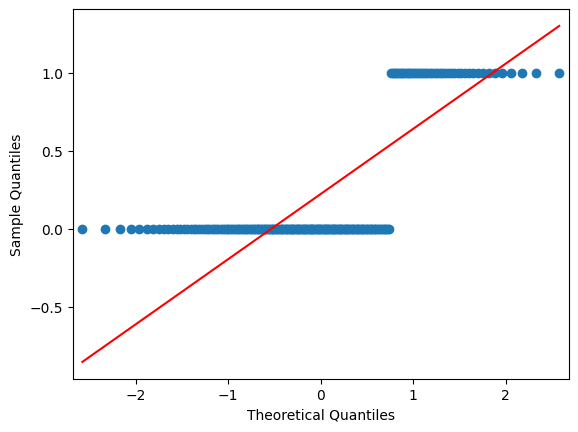

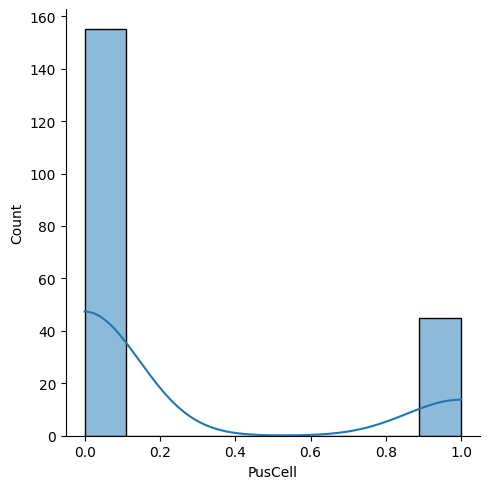

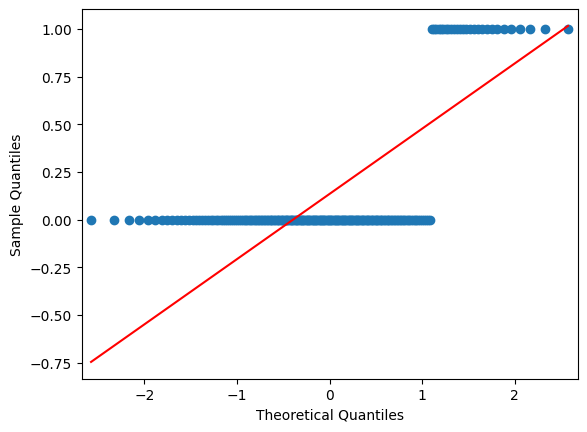

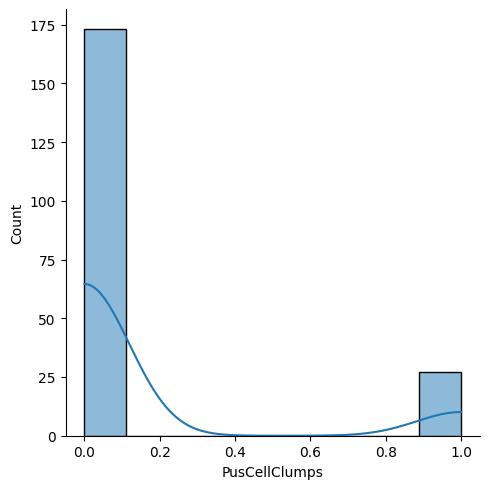

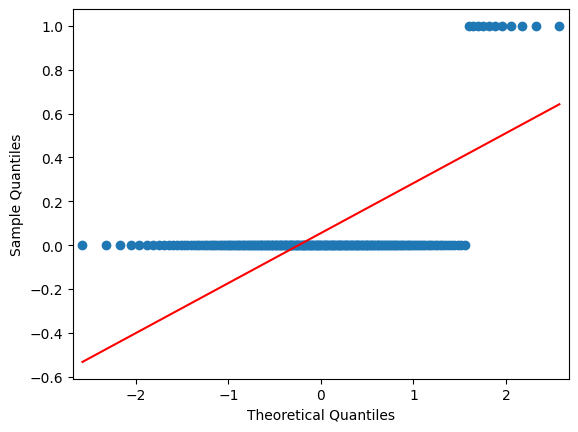

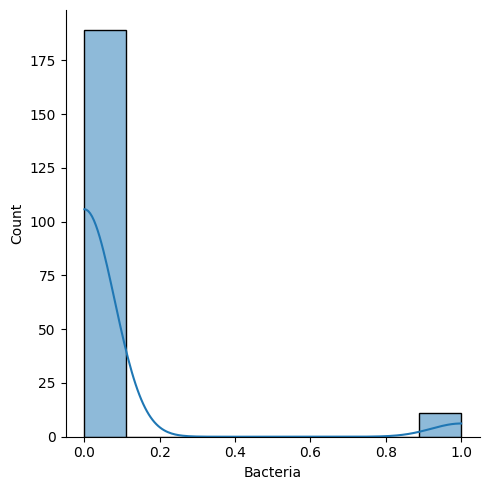

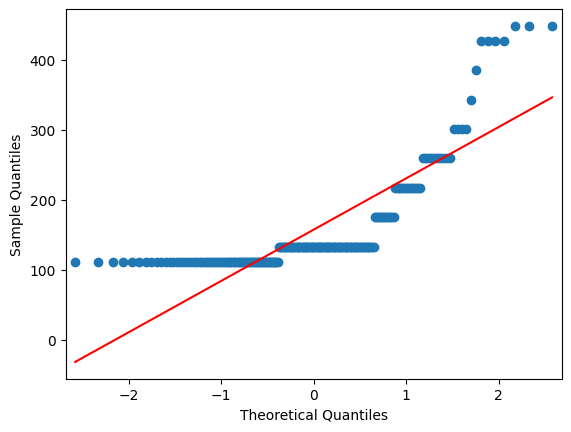

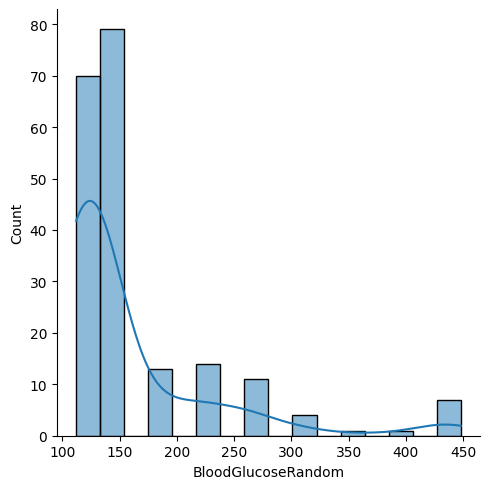

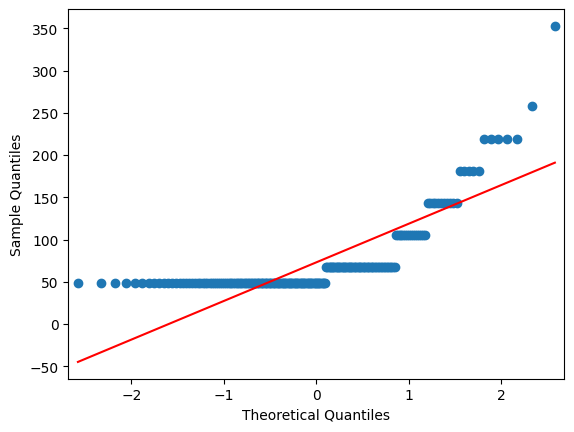

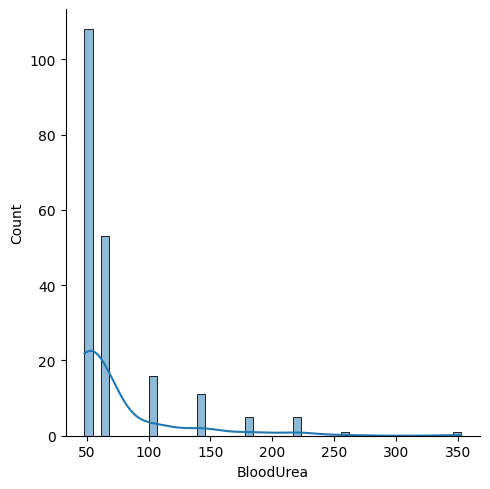

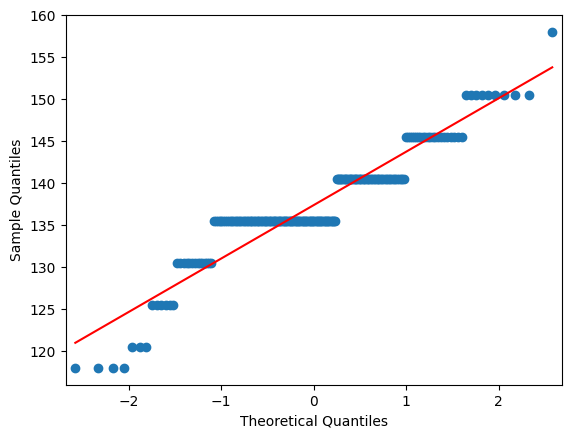

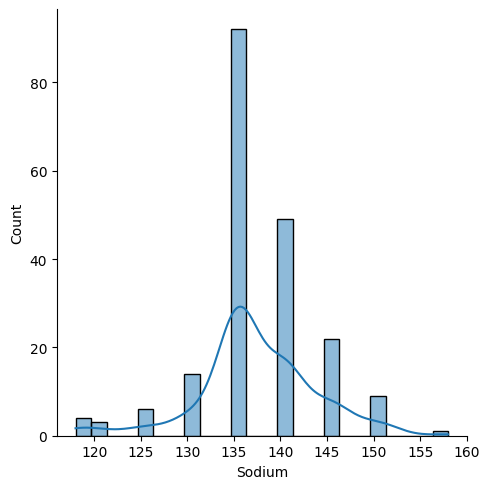

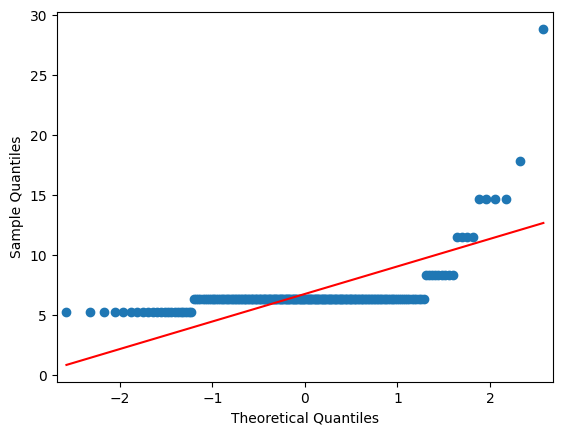

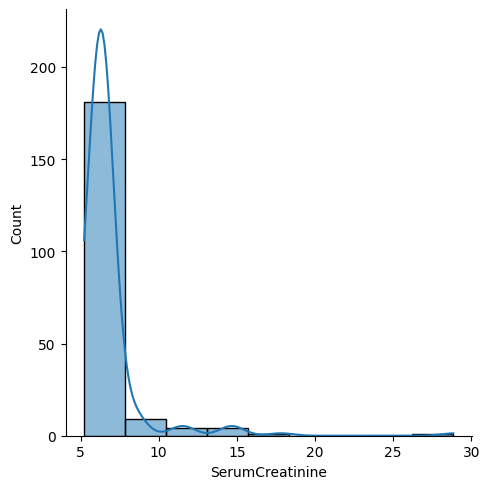

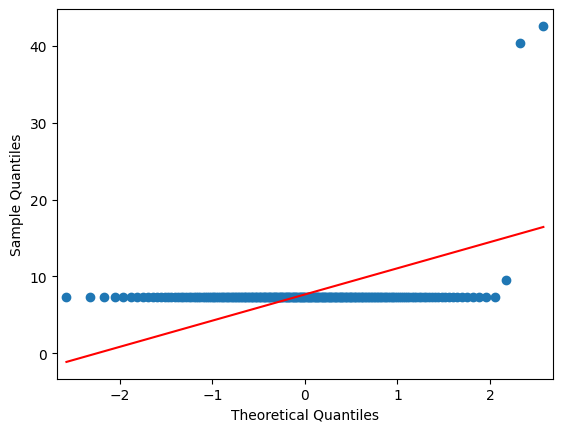

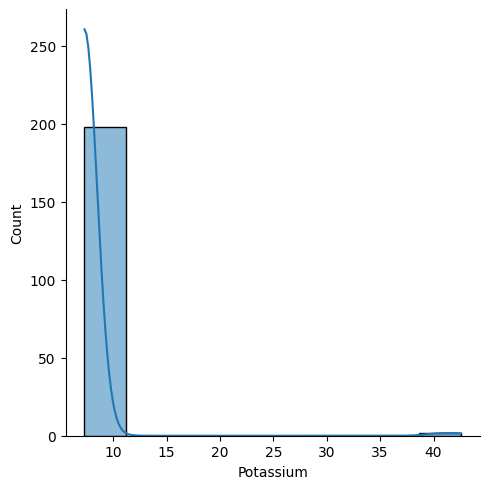

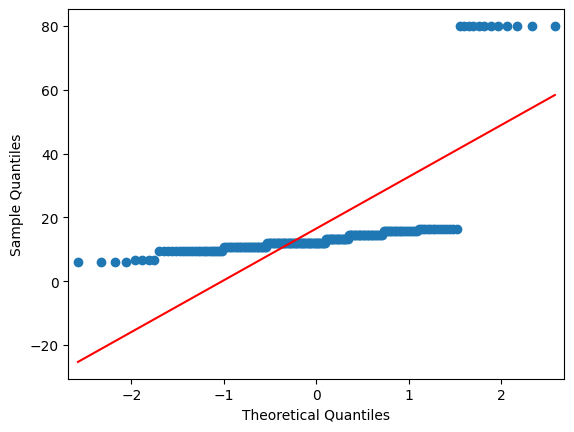

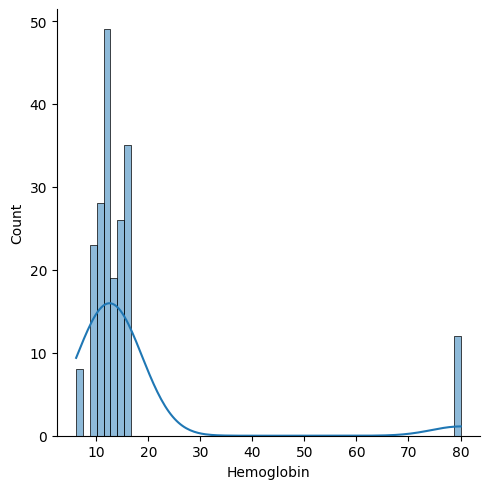

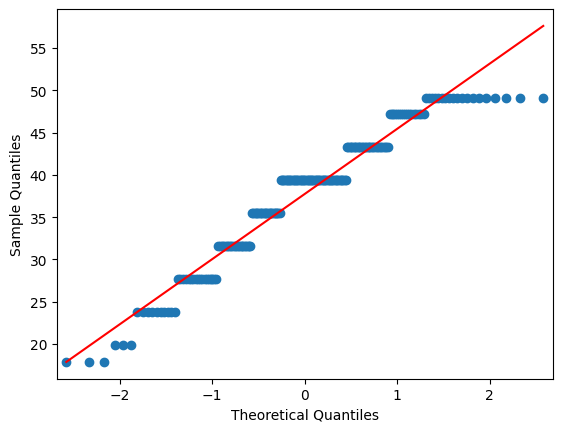

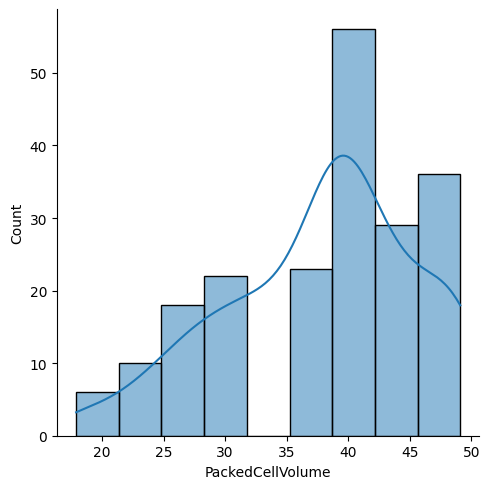

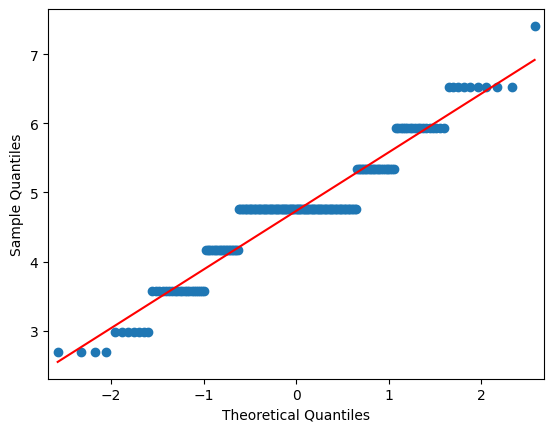

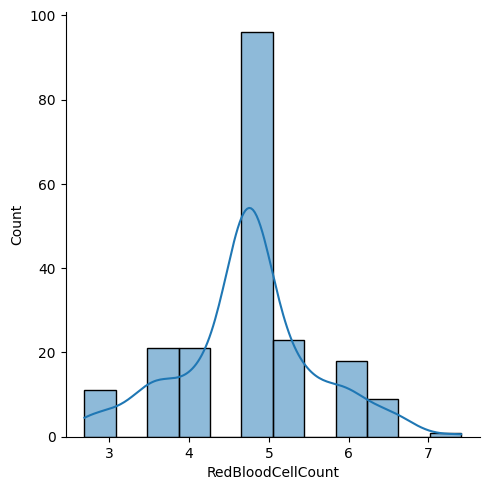

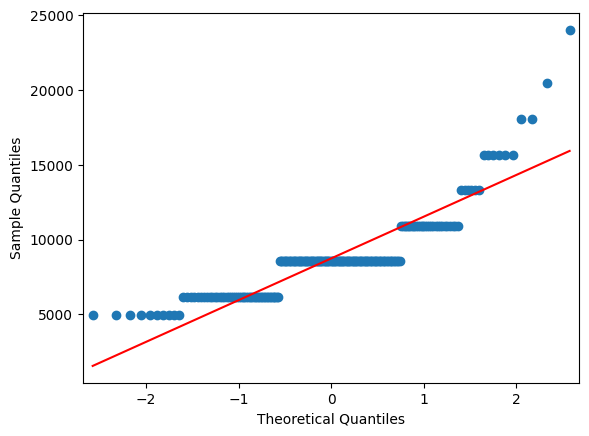

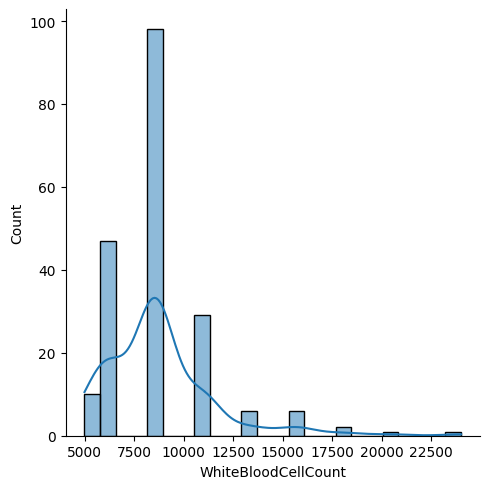

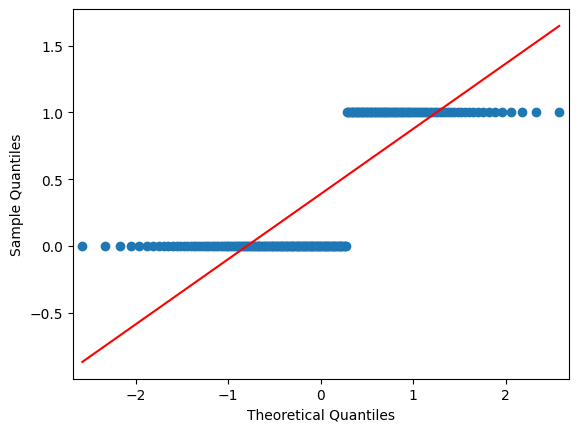

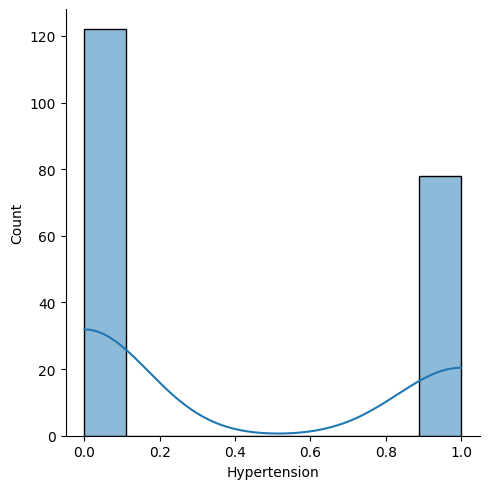

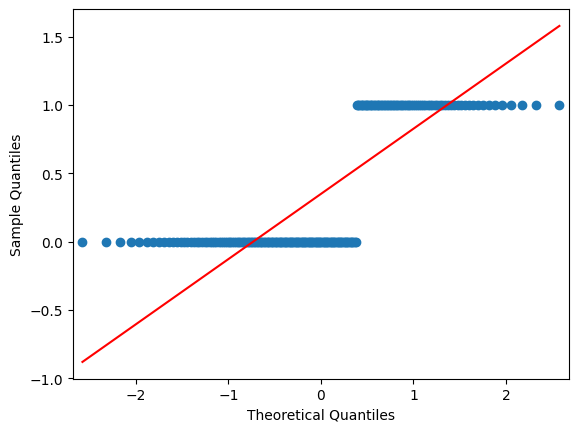

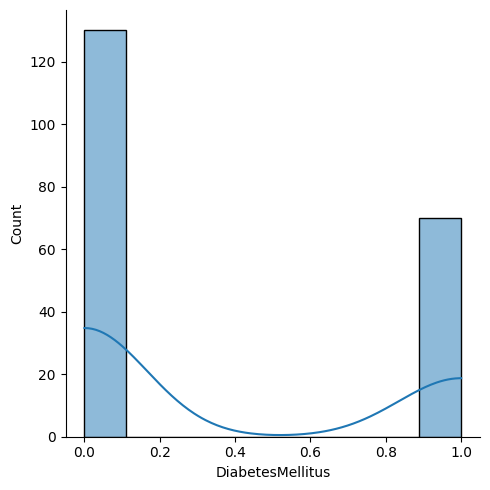

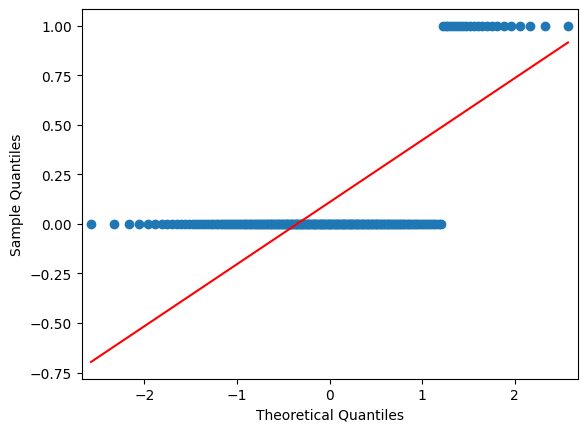

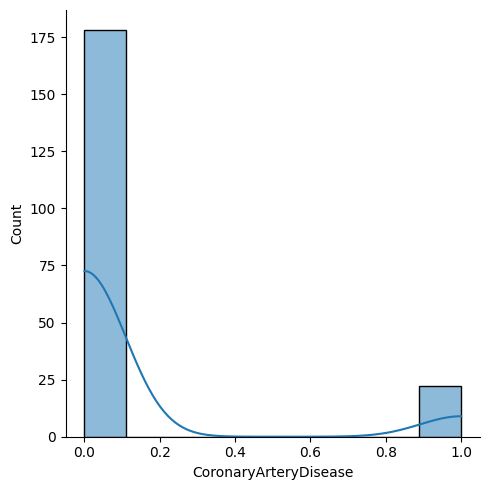

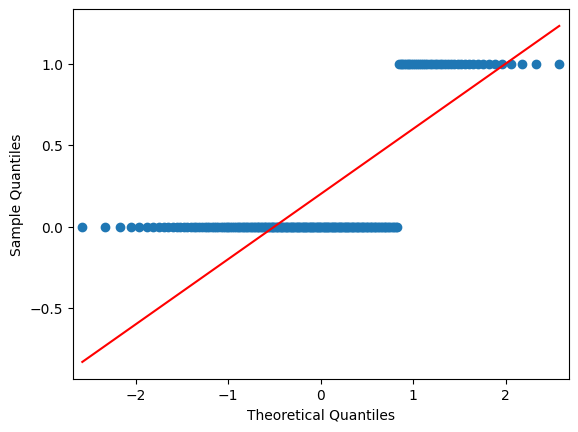

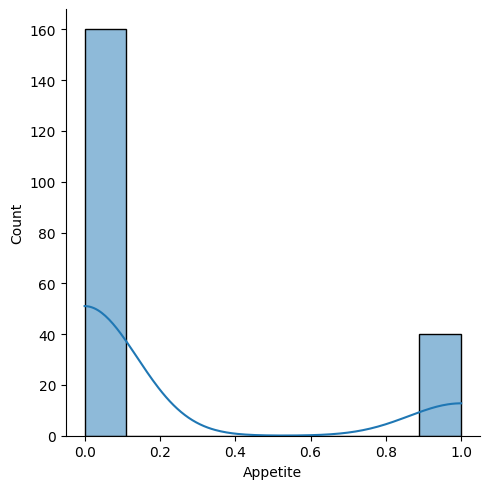

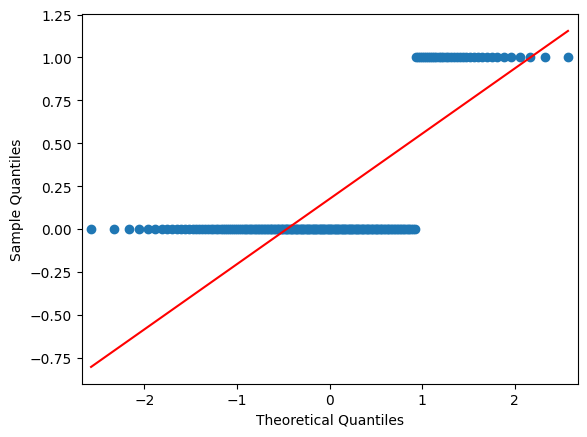

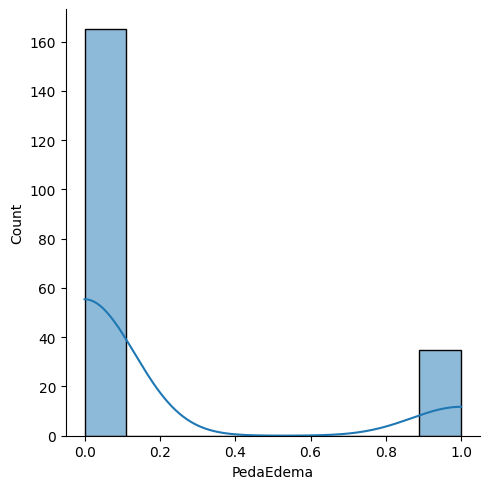

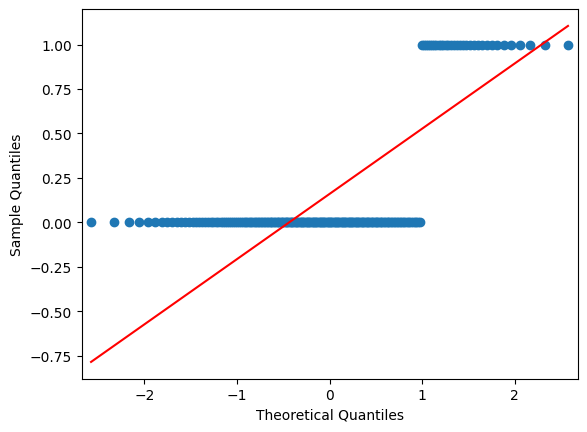

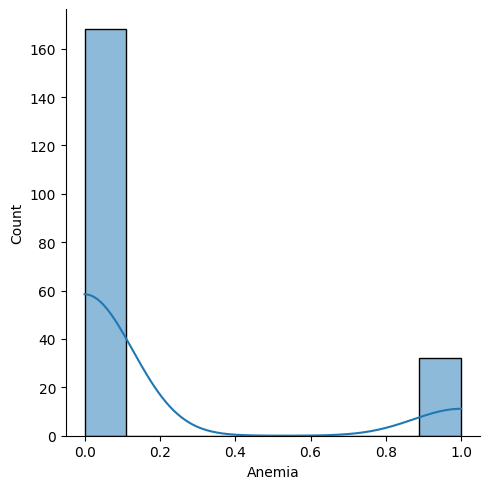

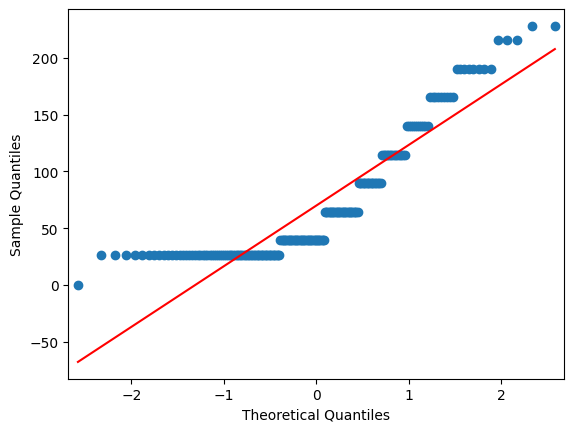

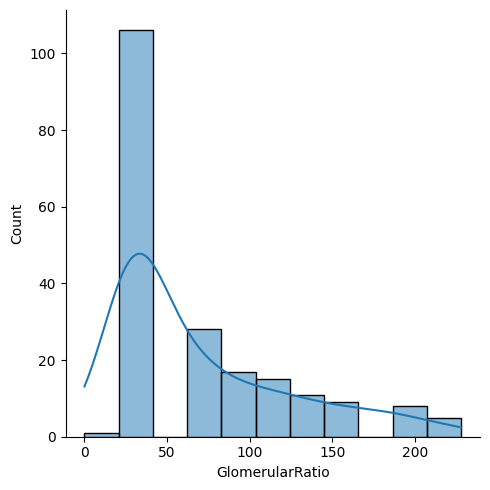

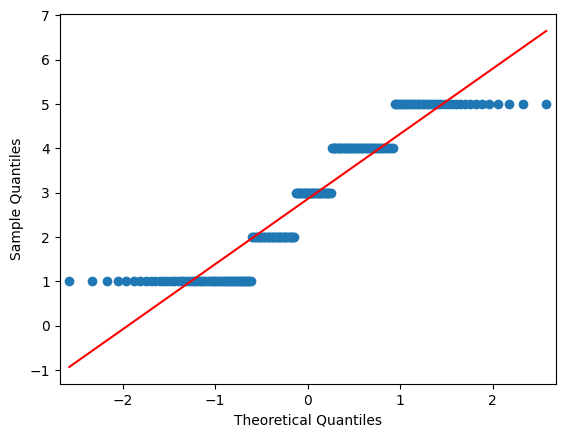

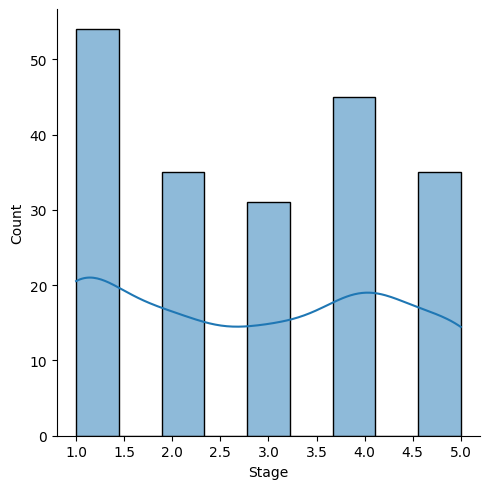

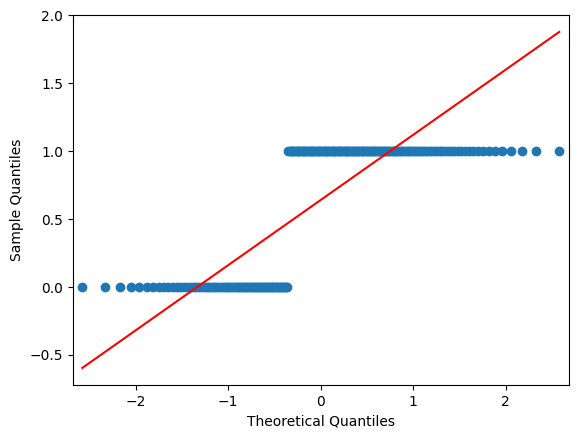

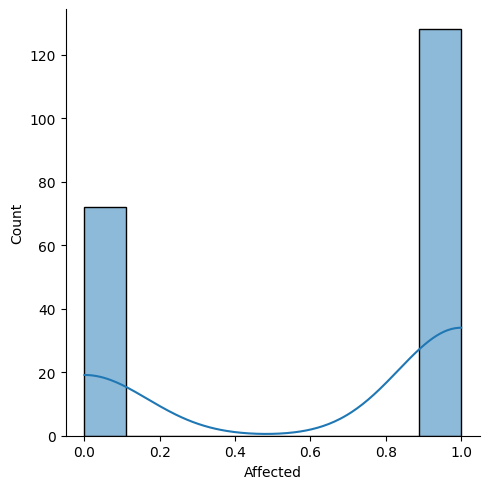

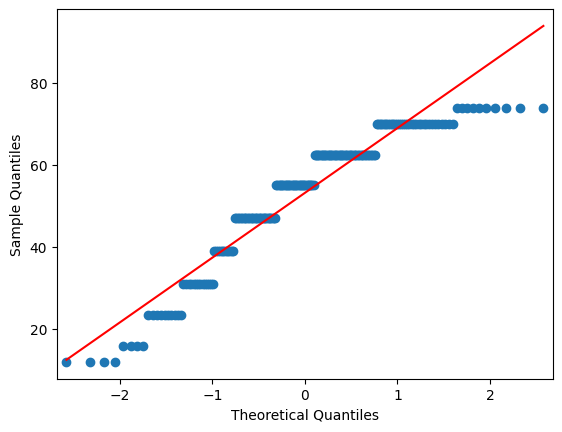

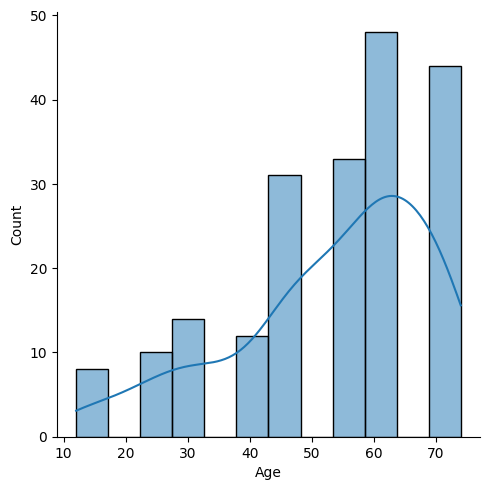

In [15]:
# QQ Plot for all variables

for f in ClassGaussTest:
  qqplot(data[f], line='s')
  sns.displot(data, x=data[f], kde=True)
  plt.show()

> As seen in the QQ plots, some features can be approximated by a Gaussian, others not so much, so it is likely that the model will tend to compensate for these variations.

In [16]:
#Classification Instances

clf_lda_Class = lda() # LDA

#Training with Default values

clf_lda_Class.fit(X_Class_train,y_Class_train)

LinearDiscriminantAnalysis()

In [17]:
#Prediction on the test set

#LDA
y_LDA_Class_pred = clf_lda_Class.predict(X_Class_test)
print('Accuracy LDA :', clf_lda_Class.score(X_Class_test, y_Class_test))

Accuracy LDA : 0.9666666666666667


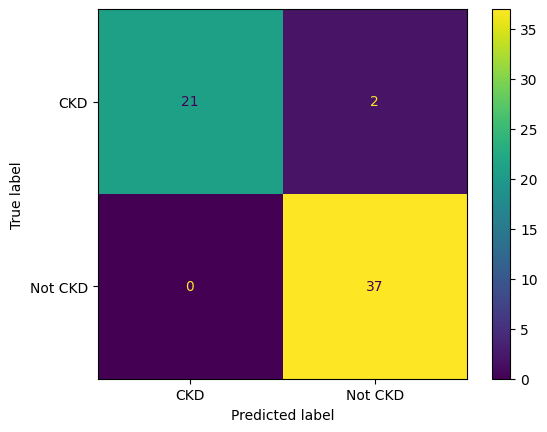

In [18]:
cm_LDA_Class=confusion_matrix(y_Class_test,y_LDA_Class_pred)

disp_LDA_Class = ConfusionMatrixDisplay(cm_LDA_Class,display_labels=['CKD','Not CKD'])
disp_LDA_Class.plot()
plt.show()

In [19]:
print(classification_report(y_Class_test,y_LDA_Class_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.913     0.955        23
           1      0.949     1.000     0.974        37

    accuracy                          0.967        60
   macro avg      0.974     0.957     0.964        60
weighted avg      0.968     0.967     0.966        60



In [27]:
# Export model to use it on Antigravity

joblib.dump(clf_lda_Class, 'Class_model.joblib')

['Class_model.joblib']

> ***OBS***: LDA algorithm gives an acceptable Accuracy and does not generate overfitting, so it is the method that will be used for predictions.

##***Stage*** classification

In [21]:
X_Stage = X

X_Stage_train,X_Stage_test,y_Stage_train,y_Stage_test = train_test_split(X_Stage,y_Stage,test_size = 0.3, random_state =1)

X_Stage_train.shape

(140, 26)

### Decision Trees

In [22]:
#Training

clf_DecTree_Stage = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=7,random_state=5)
clf_DecTree_Stage = clf_DecTree_Stage.fit(X_Stage_train, y_Stage_train)

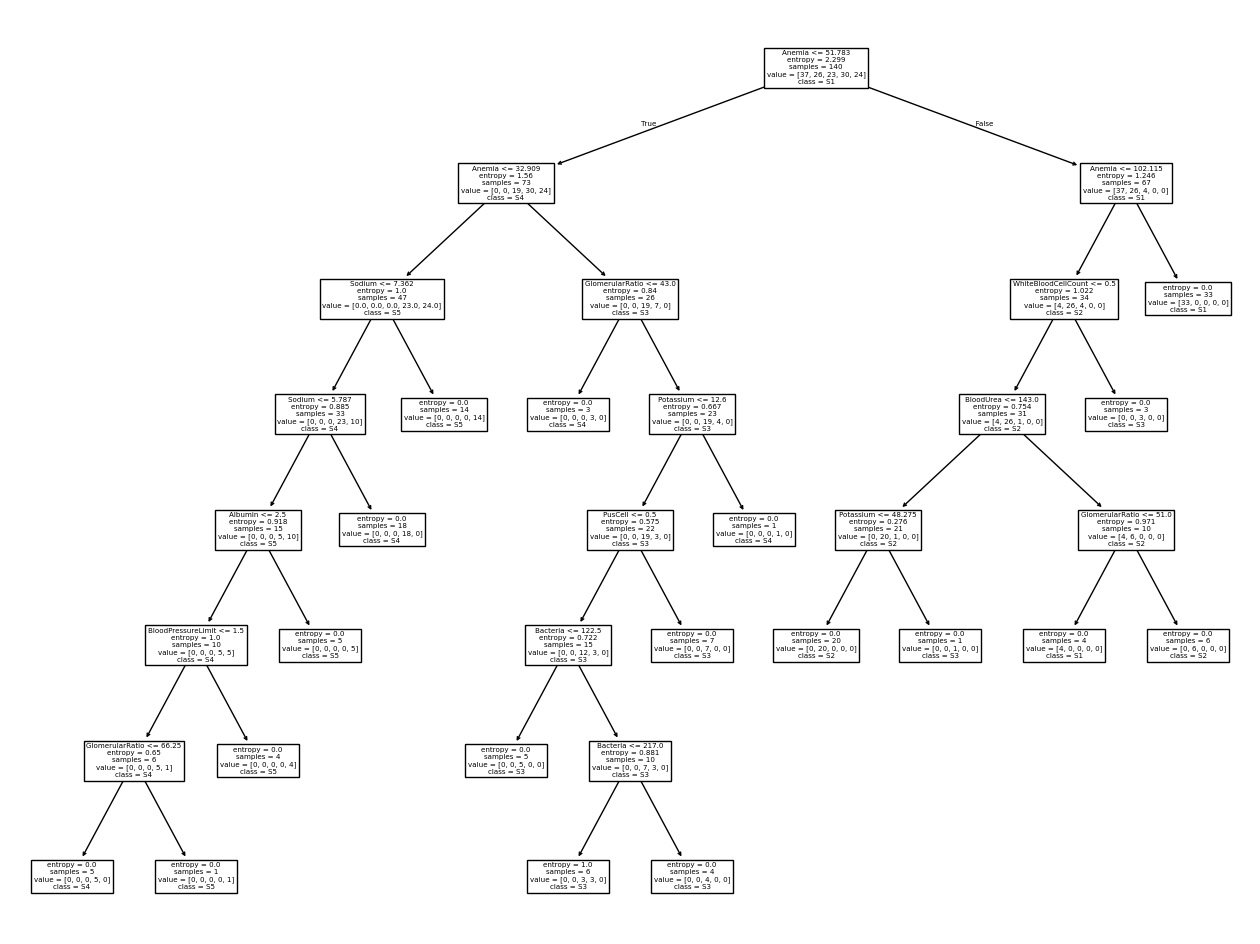

In [23]:
#Tree visualise

plt.figure(figsize=(16,12))
my_names = data_names[0:28]
my_classes = ('S1','S2','S3','S4','S5')

tree.plot_tree(clf_DecTree_Stage,feature_names=my_names, class_names= my_classes)
plt.show()

In [24]:
clf_DecTree_Stage.score(X_Stage_test,y_Stage_test)

0.8333333333333334

In [25]:
y_DecTree_Stage_pred = clf_DecTree_Stage.predict(X_Stage_test)

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       0.86      0.67      0.75         9
           3       0.64      0.88      0.74         8
           4       0.80      0.80      0.80        15
           5       0.90      0.82      0.86        11

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.83      0.83        60



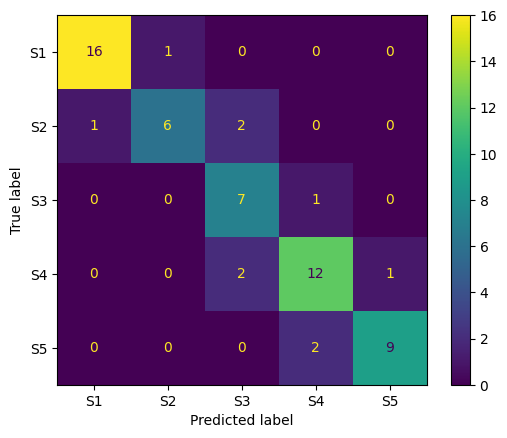

In [26]:
# Confusion Matrix

cm_DecTree_Stage = confusion_matrix(y_Stage_test,y_DecTree_Stage_pred,labels = clf_DecTree_Stage.classes_)

print(classification_report(y_Stage_test,y_DecTree_Stage_pred))
disp_DecTree_Stage = ConfusionMatrixDisplay(cm_DecTree_Stage, display_labels=['S1','S2','S3','S4','S5'])
disp_DecTree_Stage.plot()
plt.show()

In [28]:
# Export model to use it on Antigravity

joblib.dump(clf_DecTree_Stage, 'Stage_model.joblib')

['Stage_model.joblib']

# Testing Environment

> In this section the model can be used to predict the **Class** and **Stage** of new patients manually.

In [ ]:
# @title ## Chronic Kidney Disease Analyser.

# @markdown ***WELCOME TO THE CHRONIC KIDNEY DISEASE ANALYSER***

# @markdown ---

# @markdown **Enter the details of the Patient to be evaluated:**

BloodPressure = 1 # @param [0,1] {type:"raw"}
BloodPressureLimit = 2 # @param [0,1,2]{type:"raw"}
SpecificGravity = 1.010 # @param{type:"number"}
Albumin = 2 # @param [0,1,2,3,4]{type:"raw"}
RedBloodCells = 1 # @param [0,1] {type:"raw"}
SugarLevel = 1.5 # @param {type:"number"}
PusCell = 1 # @param [0,1] {type:"raw"}
PusCellClumps = 0 # @param [0,1] {type:"raw"}
Bacteria = 0 # @param [0,1] {type:"raw"}
BloodGlucoseRandom = 250 # @param {type:"number"}
BloodUrea = 215 # @param {type:"number"}
Sodium = 130 # @param{type:"integer"}
SerumCreatinine = 15 # @param {type:"number"}
Potassium = 7.31 # @param {type:"number"}
Hemoglobin = 8 # @param {type:"number"}
PackedCellVolume = 24 # @param {type:"number"}
RedBloodCellCount = 3 # @param {type:"number"}
WhiteBloodCellCount = 15000 # @param{type:"integer"}
Hypertension = 1 # @param [0,1] {type:"raw"}
DiabetesMellitus = 1 # @param [0,1] {type:"raw"}
CoronaryArteryDisease = 0 # @param [0,1] {type:"raw"}
Appetite = 1 # @param [0,1] {type:"raw"}
PedaEdema = 1 # @param [0,1] {type:"raw"}
Anemia = 1 # @param [0,1] {type:"raw"}
GlomerularRatio = 26.6175 # @param {type:"number"}
Age = 58 # @param{type:"integer"}

NewPatientTest = [[BloodPressure,BloodPressureLimit,SpecificGravity,Albumin,RedBloodCells,SugarLevel,PusCell,PusCellClumps,Bacteria,BloodGlucoseRandom,BloodUrea,Sodium,SerumCreatinine,Potassium,Hemoglobin,PackedCellVolume,RedBloodCellCount,WhiteBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedaEdema,Anemia,GlomerularRatio,Age]]

#Class

NewPatientClassResult = clf_lda_Class.predict(NewPatientTest)

print('\n Class:')

if NewPatientClassResult == [0] :
  print('\n Patient does NOT show signs of CKD')
else: print('\n Patient shows signs of CKD')
print('\n -----------------------------------------------------------------------------------------------------------------------------')

#Stage

NewPatientStageResult = clf_DecTree_Stage.predict(NewPatientTest)

print('\n Stage:')
print('\n Patient is in * Stage', NewPatientStageResult[0],'*')
print('\n OBS: The Stage is indicative and may vary in some cases by +-1, take it with precaution.')
print('\n -----------------------------------------------------------------------------------------------------------------------------')

print('\n WARNING: These results DO NOT replace any medical criteria and it is recommended to check with a medical specialist.')



 Class:

 Patient shows signs of CKD

 -----------------------------------------------------------------------------------------------------------------------------

 Stage:

 Patient is in * Stage 5 *

 OBS: The Stage is indicative and may vary in some cases by +-1, take it with precaution.

 -----------------------------------------------------------------------------------------------------------------------------



Model export

In [ ]:
# Exporting the models

joblib.dump(clf_lda_Class, 'Class_model.joblib')
joblib.dump(clf_DecTree_Stage, 'Stage_model.joblib')

# Scaler

joblib.dump(, 'scaler.joblib')

print("Models and Scaler successfully exported to Colab environment! ✅")

#Conclusion

The predictive model developed for chronic kidney disease (CKD) has demonstrated high performance, with an accuracy of 96.66% in predicting predisposition to the disease and 83.33% in predicting the stage of the patient. These results are highly significant and represent an important advance in the early detection of CKD.

The development of the CKD predictive model represents a significant advance in the fight against CKD. Its implementation can have a positive impact on public health and the quality of life of those affected.

***Discussion***

It is important to mention that the predictive model is not a perfect tool and has some limitations:

* Sample bias: The model was developed with a specific database, so its accuracy may vary in other populations.
* Access to the tool: It is important to ensure that the CKD risk assessment tool is accessible to the entire population, regardless of socioeconomic status or technological status.
* Interpretation of results: Health professionals need to be trained to interpret the results of the predictive model and provide appropriate advice to patients.

Further research is recommended to improve the model and extend its application.

#Bibliography

[1](https://www.mayoclinic.org/es/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521) Mayo Clinic (2024). Enfermedad renal crónica: Síntomas y causas. Mayo Clinic. (Accessed on February 2024).

[2](https://www.nefrologiaargentina.org.ar/numeros/2018/volumen16_2/Articulo03_Junio.pdf) Bertello, M. A., & Di Marco, N. A. (2018). Enfermedades renales en Argentina: ¿Bajo el yugo de la nefroplutocracia? Revista Nefrología Argentina, 16(2), 109-116.

[3](https://doi.org/10.1016/j.jval.2017.08.2523) Torales, S., Berardo, J., Hasdeu, S., Esquivel, M. P., Rosales, A., Azofeifa, C., et al. (2017). Estimación de costos de los servicios de hemodiálisis crónica y hemodiafiltración en Argentina. Value in Health, 20(9), A866.

[4](https://doi.org/10.26633/RPSP.2021.119) Torales, S., Berardo, J., Hasdeu, S., Esquivel, M. P., Rosales, A., Azofeifa, C., et al. (2021). Evaluación económica comparativa sobre terapias de reemplazo renal en Argentina, Costa Rica y Uruguay. Revista Panamericana de Salud Pública, 45, e119.

[5](https://www.revistanefrologia.com/es-enfermedad-renal-cronica-y-sus-articulo-X0211699507020924) Inserra, F. (2007). Enfermedad renal crónica y sus factores de riesgo en la Argentina. Revista Nefrología, 27(2), 109-236.

[6](https://www.argentina.gob.ar/sites/default/files/resolucion_ministerial_de_aprobacion_prog._erca_-_anexo.pdf)  INCUCAI. (2023). PROGRAMA ERCA - EX-2023-24907419-APN-INCUCAI#MS.

[7](https://doi.org/10.24432/C5WP64)  Islam, M. A., & Akter, S. (2023). Risk Factor prediction of Chronic Kidney Disease. UCI Machine Learning Repository.

[8](https://www.kidneyfund.org/es/todo-sobre-los-rinones/las-pruebas-de-deteccion-de-la-enfermedad-renal/analisis-de-sangre-la-egfr)  National Kidney Foundation (2024). Análisis de sangre: la eGFR. National Kidney Foundation. (Accessed on February 2024).

[9](https://www.researchgate.net/publication/320523482_Estimacion_De_Costos_De_Los_Servicios_De_Hemodialisis_Cronica_Y_Hemodiafiltracion_EN_Argentina) Palacios, A., Mengarelli, C., Pérez, S., & Augustovski, F. (2017). Estimación de costos de los servicios de hemodiálisis crónica, hemodiafiltración y diálisis peritoneal continua ambulatoria en Argentina. Revista Argentina de Salud Pública, 8(2), 86-92.




> # ***“Early detection is the best medicine”***



##**Contact: gisel.bustos@gmail.com**

### **Project Link:** https://colab.research.google.com/drive/1c7yexxfZAXf6aJ8ZLLMhlu-858vnQ6g-?usp=sharing
